In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [2]:
def create_data(n):
    '''
    returns data of n random points around centers (1,1) and (-1,-1) each
    points aroung (1,1): label 1
    points aroung (-1,-1): label 0
    '''
    
    c1 = np.random.normal(1, 0.5, (50, 2))
    c1 = np.hstack((c1, np.ones((50,1))))

    c2 = np.random.normal(-1, 0.5, (50, 2))
    c2 = np.hstack((c2, np.zeros((50,1))))

    data = np.vstack((c1, c2))
    return data

In [3]:
def sig_act(s):
    return 1.0/(1.0+math.exp(-s))

def sig_act_prime(s):
    return math.exp(-s)/(1.0+math.exp(-s))**2

def p_force(theta):

# Calculate negative gradient of L2 loss function (and the loss) for 
# a two input function modelled with a two layer (2 hidden node) network
# using sigmoidal activation
# input - parameter vector *theta*
# output - negative gradient of L2 loss *F* and *loss*

    #change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]
    g = np.zeros((9,1));           # g = gradient - start with a zero vector 
    loss = 0                       # training loss

    for i in range(len(tdata)):
        x1 = tdata[i][0]; x2 = tdata[i][1]; c = tdata[i][2];
   
        # calculate intermediates and output of network
        u1 = w11*x1 + w12*x2 + b1
        u2 = w21*x1 + w22*x2 + b2
      
        z1 = sig_act(u1)            # hidden node outputs
        z2 = sig_act(u2)
        u3 = w31*z1 + w32*z2 +b3    # 2nd layer
        
        out = sig_act(u3)
        res = c-out
        loss = loss + res**2        # update the L2 loss
        
        # now calculate the loss gradient components in reverse order
        h3 = -2*res*sig_act_prime(u3) 
        
        g[8] += h3                  # deriv with respect to bias b3
        g[5] += h3*z2               # wrt w32
        g[4] += h3*z1               # wrt w31
        
        h2 = h3* sig_act_prime(u2)  # multipliers
        h1 = h3* sig_act_prime(u1)
        
        g[7] += h2*w32              # wrt b2
        g[6] += h1*w31              # wrt b1
        g[3] += h2*w32*x2           # wrt w22
        g[2] += h2*w32*x1           # wrt w21
        g[1] += h1*w31*x2           # wrt w12
        g[0] += h1*w31*x1           # wrt w11

# negate the gradient to get the descent direction

    F = -g

    return F,loss

def Euler(q_n, h, vector_field):
# computes a step using Euler's method for the given vector field
    F,loss = vector_field(q_n)
    return q_n + h*F, loss

def compute_trajectory( q0, Nsteps, h,  step_function, vector_field):
# computes a trajectory of length *Nsteps*
# for a differential equation defined by *vector_field*
# starting from a given initial condition *q0*
# using a given method defined by *step_function*
# with stepsize *h*
#
# outputs independent variable values *t_traj*, 
# trajectory *q_traj* whose jth column is the solution at time level j

    # initialize trajectory
    q_traj = [q0]; t_traj = [0]
    F,loss = vector_field(q0)
    loss_traj = [loss]

    # starting values
    q = q0; t = 0
    
    # loop
    for n in range(Nsteps):
        # calculate next step using provided stepping function
        q,loss  = step_function(q, h,  vector_field)
        t +=  h

        # update trajectory
        q_traj.append(q)
        t_traj.append(t)
        loss_traj.append(loss)

    return q_traj, t_traj, loss_traj

def p_classifier(x1,x2,theta):
# compute 2-layer planar perceptron classifier for given inputs x1, x2
# parameter theta: a nine component vector

# change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]

    u1 = w11*x1 + w12*x2 + b1
    u2 = w21*x1 + w22*x2 + b2
      
    z1 = sig_act(u1)            # hidden node outputs
    z2 = sig_act(u2)
    u3 = w31*z1 + w32*z2 +b3    # 2nd layer
        
    
    out = sig_act(u3)         # output

    return(out)

In [4]:
tdata = create_data(50)

In [5]:
len(tdata)

100

Text(0, 0.5, 'training loss')

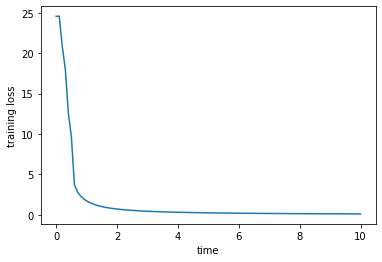

In [6]:
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,.1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

Text(0, 0.5, 'training loss')

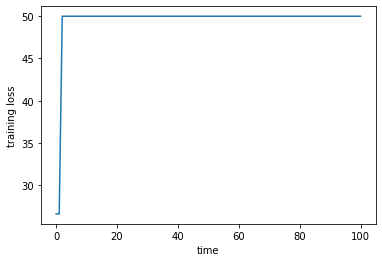

In [7]:
theta,t,loss = compute_trajectory(np.random.random((9,1)),100,1,Euler,p_force)
plt.plot(t,loss); plt.xlabel('time'); plt.ylabel('training loss')

In [ ]:
x = data[:,1]

w1

In [ ]:
p_classifier(x1,x2,theta)
#compute loss of each training point
#for i in range(len(tdata)):

#reuse marginal_posterior - specify weight